# Code associated with *Comment: Tonian paleomagnetic poles from South China are consistent with progressive tectonic motion over the North Pole*

This code conducts E/I analysis and incorporates uncertainties associated with inclination shallowing into Tonian paleomagnetic poles from South China. The code generates the figure within the comment.

In [87]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

import cartopy.crs as ccrs
import cartopy
import xml.etree.ElementTree as ET
import pygplates as pgp

Jing2025_lat = 29.10
Jing2025_lon = 102.84

ModuleNotFoundError: No module named 'pygplates'

## Import and plot Jing et al. 2025 directions

Measurement level data were not provided by the authors associated with the publication. Directions in tilt-corrected coordinates resulting from specimen-level fits were provided in Table S1. These directions are imported below.

In [2]:
Jing_directions = pd.read_csv("Jing2025_directions.csv")
Jing_directions.head()

,sample,declination,inclination,strat_level,MAD
0,SL181,288.0,-33.8,100.0,9.2
1,SL182,317.6,-41.5,100.1,3.5
2,SL183,314.1,-38.9,100.2,5.5
3,SL184,315.9,-36.5,100.3,5.0
4,SL185,330.8,-42.9,102.0,0.5


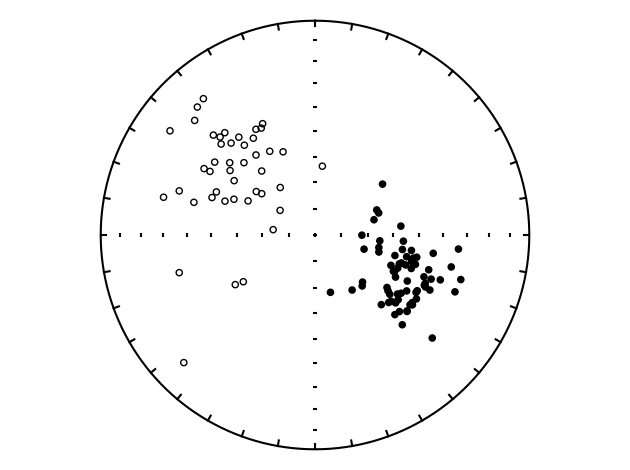

In [3]:
ipmag.plot_net()
ipmag.plot_di(Jing_directions['declination'], Jing_directions['inclination'])

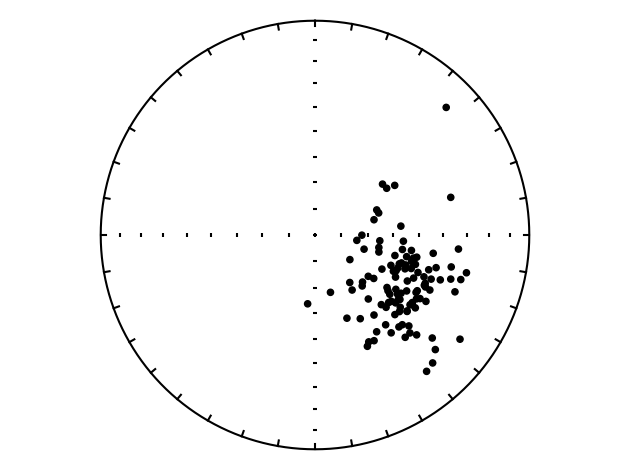

In [4]:
Jing_directions_unified = np.array(pmag.flip(ipmag.make_di_block(Jing_directions['declination'], Jing_directions['inclination']), 
                                              combine=True))
ipmag.plot_net()
ipmag.plot_di(di_block= Jing_directions_unified)

## Apply E/I analysis to the Jing et al. 2025 data

We can apply E/I analysis to the Jing et al. 2025 data and then use the confidence bounds on the f-factor to calculate a pole that incorporates such uncertainty.

Bootstrapping.... be patient



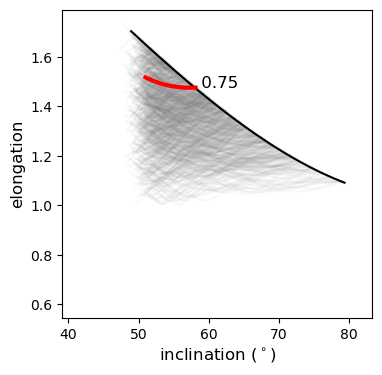

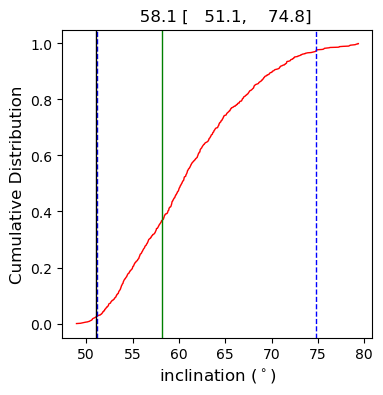

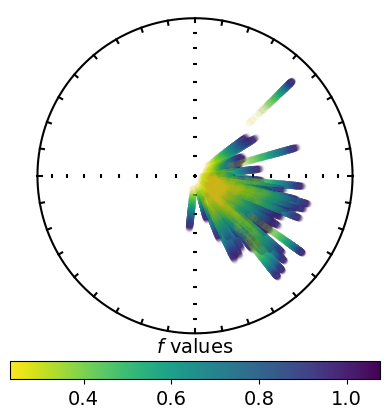

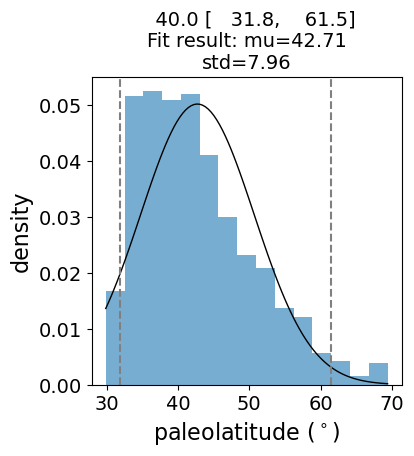

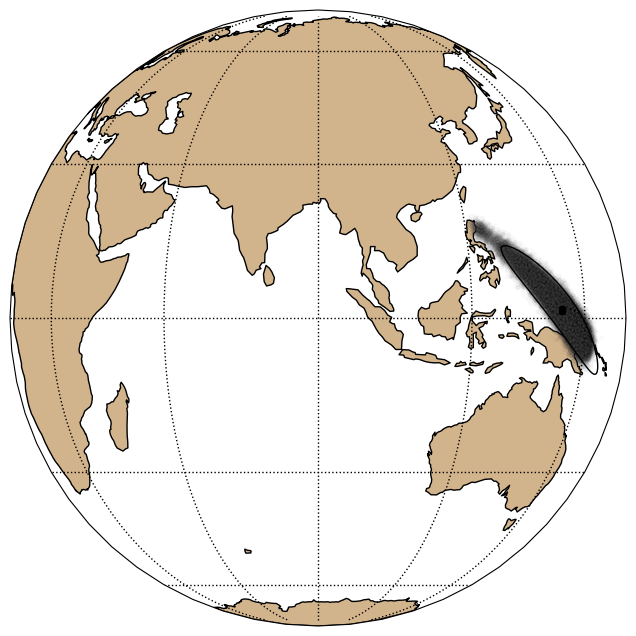

The original inclination was: 51.0

The corrected inclination is: 58.12
with bootstrapped confidence bounds of: 51.11 to 74.8
and elongation parameter of: 1.48
The flattening factor is: 0.75
with bootstrapped confidence bounds of: 1.0 to 0.34

The Kent mean incorporating inclination flattening uncertainty is:
Plon: 142.4  Plat: 1.6
Major axis lon: 51.1  Major axis lat: 39.6
Minor axis lon: 234.3  Minor axis lat: 50.3
Major axis angle of 95% ellipse (Zeta): 18.7
Minor axis angle of 95% ellipse (Eta): 3.4
Number of directions in mean (n): 100000


In [6]:
Jing2025_Kent_mean_pole = ipmag.find_ei_kent(Jing_directions_unified, Jing2025_lat, Jing2025_lon, central_longitude=90)

## Chenjiang pole

Park et al. (2021) calculated a paleomagnetic pole from the site mean data published in Jing et al. 2019 in which they transformed the site mean directions to VGPs and then calculated a mean.

Plon: 75.5  Plat: 29.3
Major axis lon: 343.7  Major axis lat: 3.2
Minor axis lon: 248.0  Minor axis lat: 60.5
Major axis angle of 95% ellipse (Zeta): 15.7
Minor axis angle of 95% ellipse (Eta): 11.0
Number of directions in mean (n): 7000


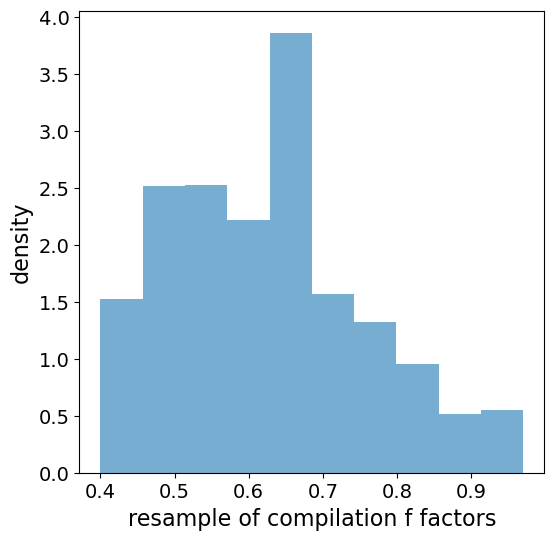

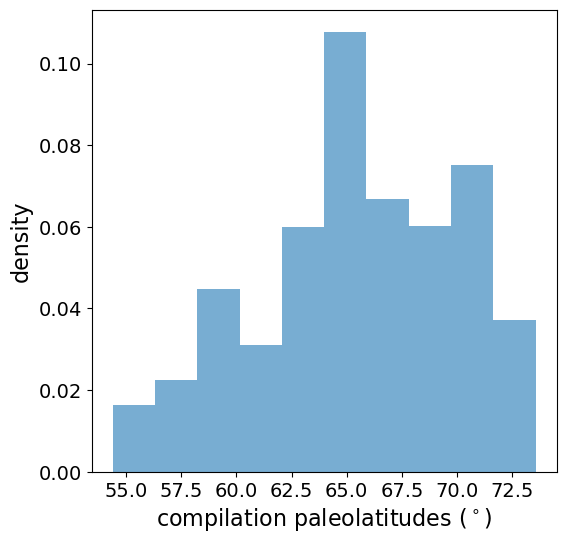

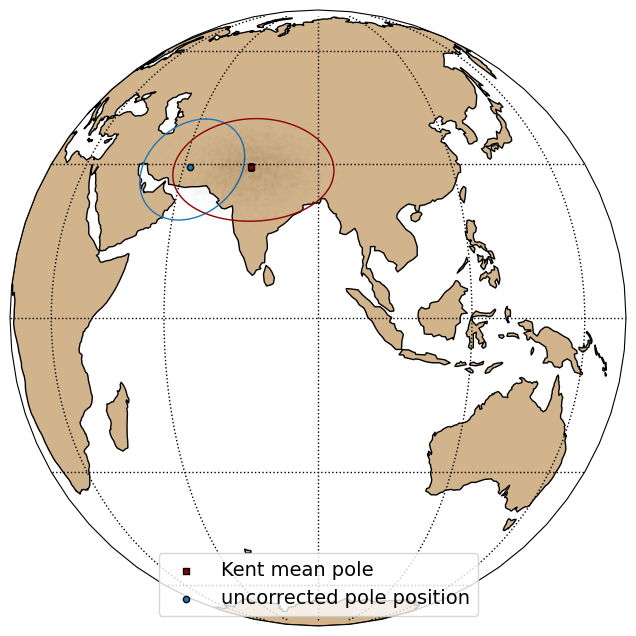

In [10]:
Chenjiang_plon = 61.5
Chenjiang_plat = 29.4
Chenjiang_A95 = 10.8
Chenjiang_lon = 102.411
Chenjiang_lat = 25.145
Chenjiang_Kent_mean = ipmag.find_compilation_kent(Chenjiang_plon, Chenjiang_plat, Chenjiang_A95, Chenjiang_lon, Chenjiang_lat,
                                                  map_central_longitude=90)

## Xiajiang pole

Plon: 103.8  Plat: 42.7
Major axis lon: 303.0  Major axis lat: 45.7
Minor axis lon: 202.9  Minor axis lat: 9.7
Major axis angle of 95% ellipse (Zeta): 14.4
Minor axis angle of 95% ellipse (Eta): 12.6
Number of directions in mean (n): 7000


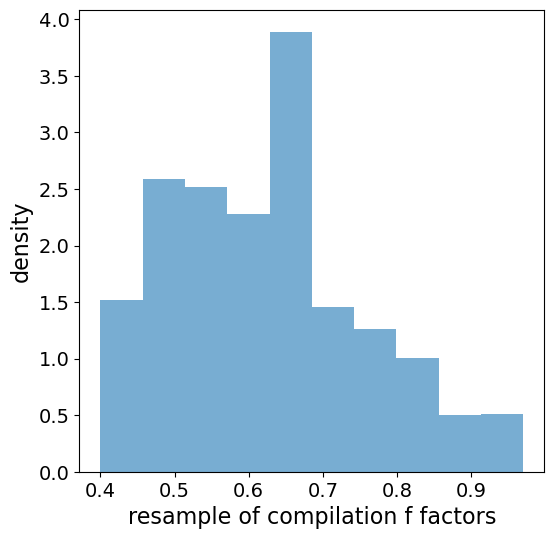

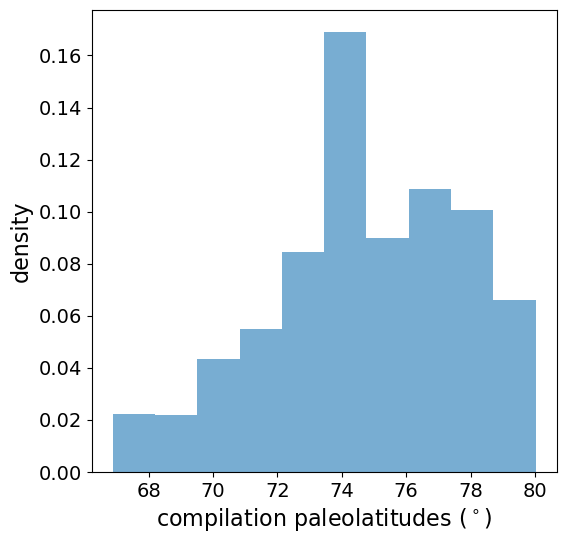

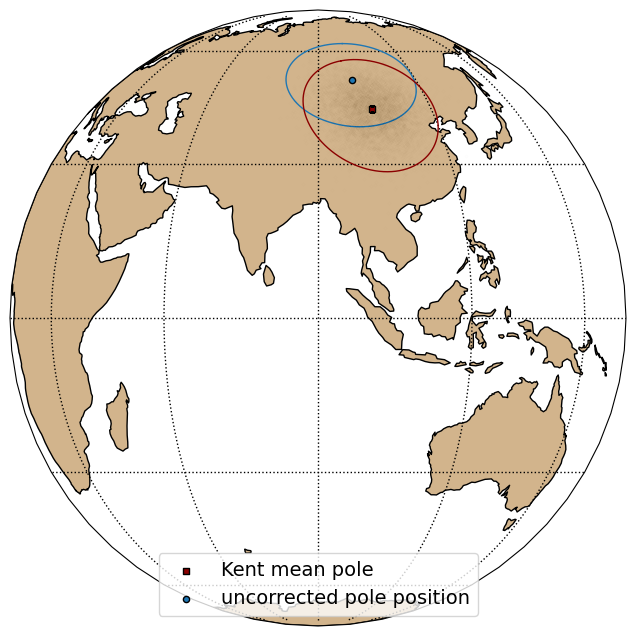

In [31]:
Xiajiang_plon = 100.0
Xiajiang_plat = 50.7
Xiajiang_A95 = 12.3
Xiajiang_lon = 108.82
Xiajiang_lat = 27.91
Xiajiang_Kent_mean = ipmag.find_compilation_kent(Xiajiang_plon, Xiajiang_plat, Xiajiang_A95, Xiajiang_lon, Xiajiang_lat,
                                                  map_central_longitude=90)

## Liantuo poles

Plon: 136.1  Plat: 25.2
Major axis lon: 37.0  Major axis lat: 18.6
Minor axis lon: 274.6  Minor axis lat: 57.9
Major axis angle of 95% ellipse (Zeta): 13.0
Minor axis angle of 95% ellipse (Eta): 8.9
Number of directions in mean (n): 7000


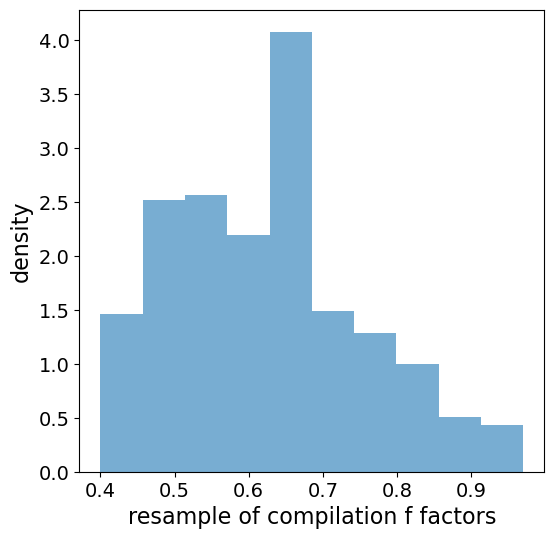

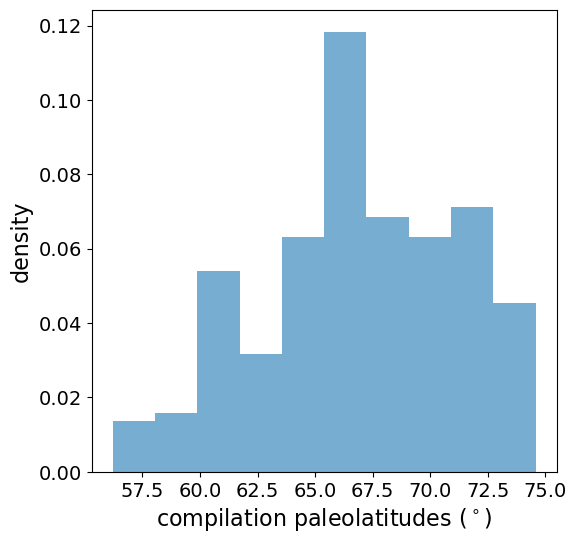

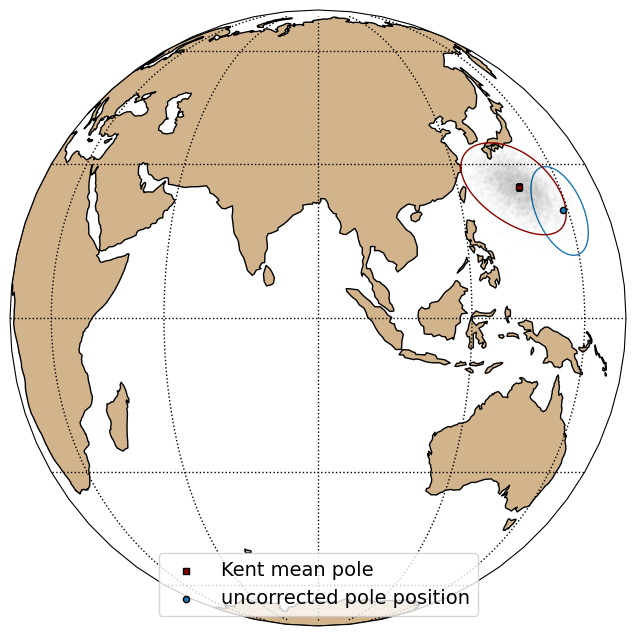

In [20]:
lower_Liantuo_plon = 148.0
lower_Liantuo_plat = 20.6
lower_Liantuo_A95 = 8.8
lower_Liantuo_lat = 30.8
lower_Liantuo_lon = 111.1
lower_Liantuo_Kent_mean = ipmag.find_compilation_kent(lower_Liantuo_plon, lower_Liantuo_plat, lower_Liantuo_A95, lower_Liantuo_lon, lower_Liantuo_lat,
                                                  map_central_longitude=90)

Plon: 144.5  Plat: 19.6
Major axis lon: 44.7  Major axis lat: 25.5
Minor axis lon: 267.7  Minor axis lat: 56.9
Major axis angle of 95% ellipse (Zeta): 13.6
Minor axis angle of 95% ellipse (Eta): 5.4
Number of directions in mean (n): 7000


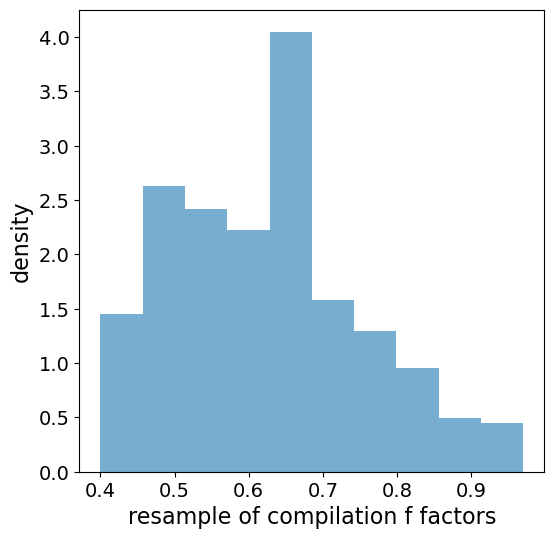

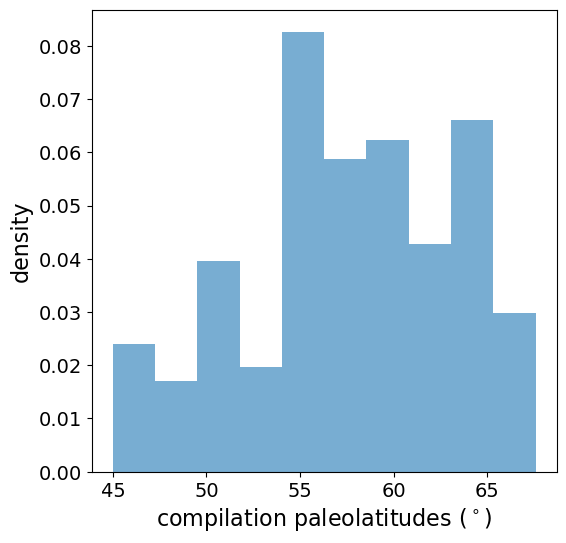

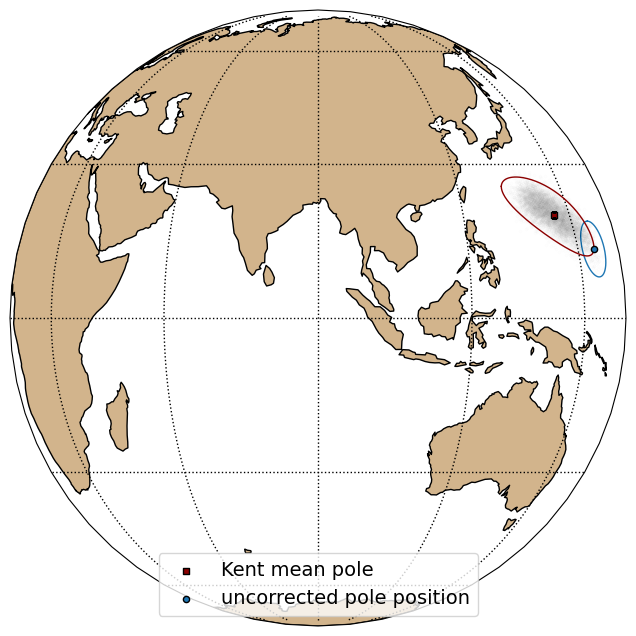

In [21]:
upper_Liantuo_plon = 157.1
upper_Liantuo_plat = 13.0
upper_Liantuo_A95 = 5.3
upper_Liantuo_lat = 30.819
upper_Liantuo_lon = 111.069
upper_Liantuo_Kent_mean = ipmag.find_compilation_kent(upper_Liantuo_plon, upper_Liantuo_plat, upper_Liantuo_A95, upper_Liantuo_lon, upper_Liantuo_lat,
                                                  map_central_longitude=90)

## Madiyi pole

Plon: 82.3  Plat: 34.4
Major axis lon: 347.3  Major axis lat: 7.3
Minor axis lon: 246.9  Minor axis lat: 54.7
Major axis angle of 95% ellipse (Zeta): 13.0
Minor axis angle of 95% ellipse (Eta): 5.2
Number of directions in mean (n): 7000


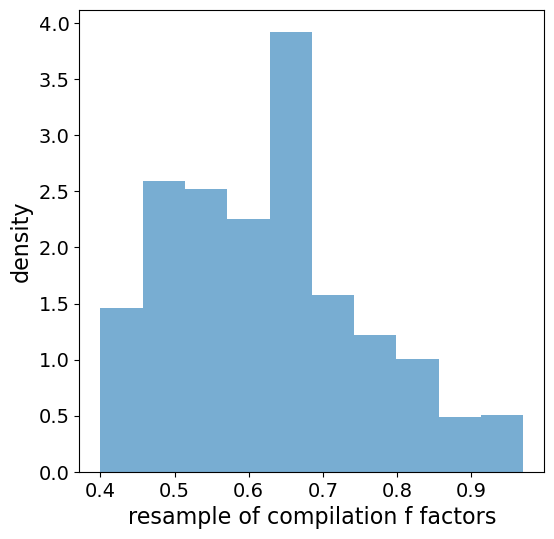

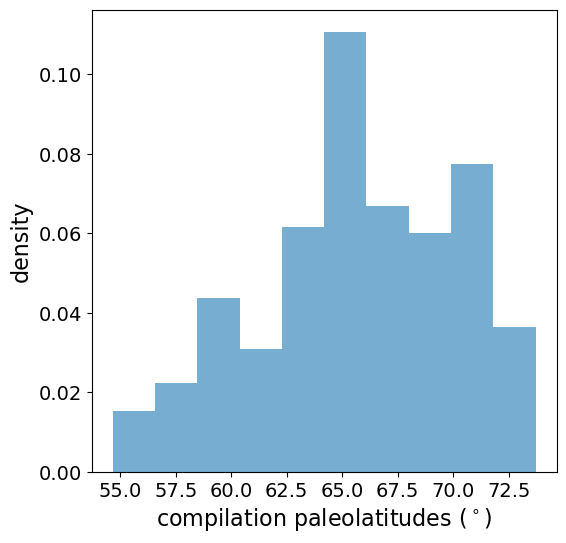

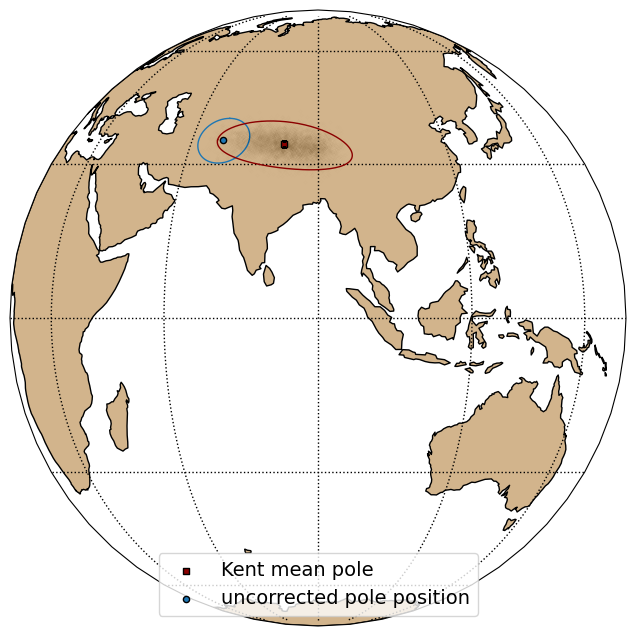

In [26]:
Madiyi_plon = 67.9
Madiyi_plat = 35.3
Madiyi_lon = 109.6
Madiyi_lat = 27.5
Madiyi_A95 = np.sqrt(4.7*5.5)

Madiyi_Kent_mean = ipmag.find_compilation_kent(Madiyi_plon, Madiyi_plat, Madiyi_A95, Madiyi_lon, Madiyi_lat,
                                                  map_central_longitude=90)

In [41]:
Xiaofeng_plon = 82.1
Xiaofeng_plat = 26.1
Xiaofeng_A95 = 14.6

Guzhang_sills_plon = 116.8
Guzhang_sills_plat = 25.6
Guzhang_sills_A95 = 9.9

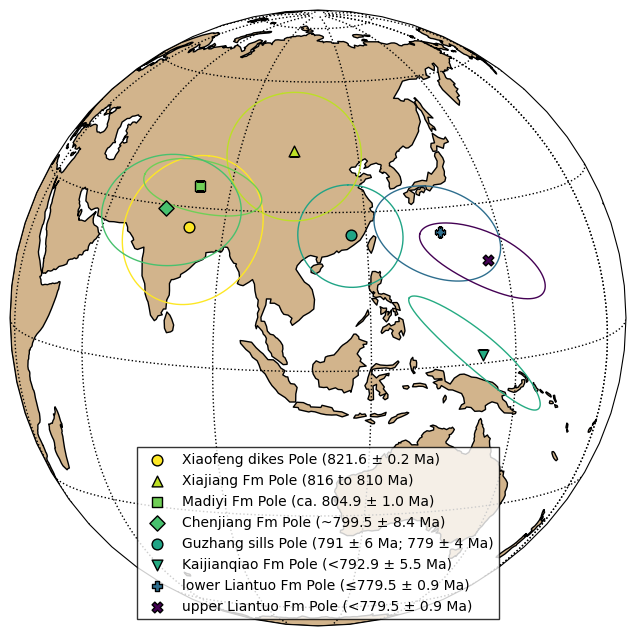

In [ ]:
from matplotlib import cm, colors

pole_axis = ipmag.make_orthographic_map(central_latitude=10, central_longitude=110)
plt.figure(num=1,figsize=(12, 12))

Xiaofeng_age = 821.64
Xiajiang_age = 813
Madiyi_age = 804.9
Chenjiang_age = 799.5
Jing2025_age = 792.9
Guzhang_sills_age = 791
lower_Liantuo_age = 775
upper_Liantuo_age = 750

age_min, age_max = 750, 820
cmap = cm.get_cmap('viridis')
norm = colors.Normalize(vmin=age_min, vmax=age_max)

Xiaofeng_color = cmap(norm(Xiaofeng_age))
Xiajiang_color = cmap(norm(Xiajiang_age))
Madiyi_color = cmap(norm(Madiyi_age))
Chenjiang_color = cmap(norm(Chenjiang_age))
Jing2025_color = cmap(norm(Jing2025_age))
Guzhang_sills_color = cmap(norm(Guzhang_sills_age))
lower_Liantuo_color = cmap(norm(lower_Liantuo_age))
upper_Liantuo_color = cmap(norm(upper_Liantuo_age))


ipmag.plot_pole(pole_axis, Xiaofeng_plon, Xiaofeng_plat, Xiaofeng_A95, color=Xiaofeng_color, 
                label='Xiaofeng dikes Pole (821.6 ± 0.2 Ma)', markersize=60)
ipmag.plot_pole_ellipse(pole_axis, Xiajiang_Kent_mean, lower=0, color=Xiajiang_color,
                        marker='^', label='Xiajiang Fm Pole (816 to 810 Ma)', markersize=60)
ipmag.plot_pole_ellipse(pole_axis, Madiyi_Kent_mean, lower=0, color=Madiyi_color,
                        marker='s', label='Madiyi Fm Pole (ca. 804.9 ± 1.0 Ma)', markersize=60)
ipmag.plot_pole_ellipse(pole_axis, Chenjiang_Kent_mean, lower=0, color=Chenjiang_color,
                        marker='D', label='Chenjiang Fm Pole (~799.5 ± 8.4 Ma)', markersize=60)
ipmag.plot_pole(pole_axis, Guzhang_sills_plon, Guzhang_sills_plat, Guzhang_sills_A95, color=Guzhang_sills_color, 
                label='Guzhang sills Pole (791 ± 6 Ma; 779 ± 4 Ma)', markersize=60)
ipmag.plot_pole_ellipse(pole_axis, Jing2025_Kent_mean_pole, lower=0, color=Jing2025_color, 
                        marker='v', label='Kaijianqiao Fm Pole (<792.9 ± 5.5 Ma)', markersize=60)
ipmag.plot_pole_ellipse(pole_axis, lower_Liantuo_Kent_mean, lower=0, color=lower_Liantuo_color, 
                        marker='P', label='lower Liantuo Fm Pole (≤779.5 ± 0.9 Ma)', markersize=60)
ipmag.plot_pole_ellipse(pole_axis, upper_Liantuo_Kent_mean, lower=0, color=upper_Liantuo_color, 
                        marker='X', label='upper Liantuo Fm Pole (<779.5 ± 0.9 Ma)', markersize=60)

plt.legend(loc='lower center',fancybox=False,edgecolor='black')
plt.show()

In [86]:
def rotated_pole_plot(ax, plon, plat, a95, Eulers, marker='o', s=20, marker_color='r', alpha=0.6):
    """
    Plot paleomagnetic pole with rotation using ipmag.plot_pole().
    """
    # rotate pole
    rotated_plat = plat
    rotated_plon = plon
    for i in range(len(Eulers)):
        rotated_plat, rotated_plon = pmag.pt_rot(Eulers[i], [rotated_plat], [rotated_plon])
        rotated_plat = rotated_plat[0]
        rotated_plon = rotated_plon[0]

    # plot pole and a95 using ipmag.plot_pole
    ipmag.plot_pole(ax, rotated_plon, rotated_plat, a95, color=marker_color, 
                    label='', markersize=s,  A95_alpha=alpha, outline=False)
    return rotated_plon, rotated_plat


def rotated_kent_pole_plot(ax, kent_dict, Eulers, marker='o', s=20, marker_color='r', alpha=0.6, lower=False):
    """
    Plot Kent mean paleomagnetic pole with rotation.
    """
    dec = kent_dict['dec']
    inc = kent_dict['inc']
    Zdec = kent_dict['Zdec']
    Zinc = kent_dict['Zinc']
    Edec = kent_dict['Edec']
    Einc = kent_dict['Einc']
    Zeta = kent_dict['Zeta']
    Eta = kent_dict['Eta']

    # rotate pole
    for i in range(len(Eulers)):
        inc, dec = pmag.pt_rot(Eulers[i], [inc], [dec])
        Zinc, Zdec = pmag.pt_rot(Eulers[i], [Zinc], [Zdec])
        Einc, Edec = pmag.pt_rot(Eulers[i], [Einc], [Edec])

        dec = dec[0]
        inc = inc[0]
        Zdec = Zdec[0]
        Zinc = Zinc[0]
        Edec = Edec[0]
        Einc = Einc[0]
    
    rotated_dict = {'dec': dec, 'inc': inc, 'Zdec': Zdec, 'Zinc': Zinc, 'Edec': Edec, 'Einc': Einc, 'Zeta': Zeta, 'Eta': Eta}
    ipmag.plot_pole_ellipse(ax, rotated_dict, 
                            color = marker_color,
                            edgecolor = marker_color,
                            marker = marker,
                            markersize = s,
                            label = '',
                            alpha = alpha,
                            lower= lower,
                            zorder= 100)
    return ax


def craton_plot(ax, plateIDs, Eulers, edgecolor, facecolor, alpha, linewidth, reverse_draw=False):
    """
    Plot cratons with rotation.
    
    Parameters
    ----------
    ax : map axis
        On which to plot.
    
    plateIDs : list
        Of plateIDs.
        
    Eulers : list of lists
        Of Euler rotation parameters - if more than one given,
        the rotations will be additive.
    """
    # get cratons from .gpml
    gpml = 'shapes_cratons.gpml'
    Xs, Ys = get_craton_XYs(gpml, plateIDs)
    
    # draw in reverse
    if reverse_draw:
        Xs = np.flip(Xs)
        Ys = np.flip(Ys)
    
    # rotate cratons
    rotated_Xs = []
    rotated_Ys = []
    for i in range(len(Xs)):
        rotated_X = np.array([])
        rotated_Y = np.array([])
        for j in range(len(Xs[i])):
            this_X = [Xs[i][j]]
            this_Y = [Ys[i][j]]
            for k in range(len(Eulers)):
                this_Y, this_X = pmag.pt_rot(Eulers[k], this_Y, this_X)
            rotated_X = np.append(rotated_X, this_X)
            rotated_Y = np.append(rotated_Y, this_Y)
        rotated_Xs.append(rotated_X)
        rotated_Ys.append(rotated_Y)
        
    # add cratons
    for i in range(len(rotated_Xs)):
        XY = np.stack([rotated_Xs[i][::-1],rotated_Ys[i][::-1]],axis=1)
        poly_edge = patches.Polygon(XY,
                                    edgecolor=edgecolor,facecolor='none',alpha=alpha,
                                    transform=ccrs.Geodetic(), linewidth=linewidth)
        poly_face = patches.Polygon(XY,
                                    edgecolor='none',facecolor=facecolor,alpha=alpha,
                                    transform=ccrs.Geodetic())
        ax.add_patch(poly_face)
        ax.add_patch(poly_edge)


def get_craton_XYs(gpml, plateIDs):
    """
    Get XY coordinates of a plate polygon from a .gpml.
    
    Parameters
    ----------
    gpml : string
        Path to .gpml file.
        
    plateIDs : list
        Of plateIDs.
    """
    # namespace dictionary
    ns = {'gpml':'http://www.gplates.org/gplates',
          'gml':'http://www.opengis.net/gml'}
    
    # initial parse
    tree = ET.parse(gpml)
    root = tree.getroot()
    
    # storage
    Xs = []
    Ys = []
    
    # iterate through featureMembers
    for featureMember in root.findall('gml:featureMember',ns):
        
        # get child
        for child in featureMember:
            slice_ind = child.tag.find('}')
            child_root = 'gpml:' + child.tag[slice_ind+1:]
        
        # check plateID
        plateID_path = child_root + '/gpml:reconstructionPlateId/gpml:ConstantValue/gpml:value'
        feature_plateID = int(featureMember.find(plateID_path,ns).text)
        if feature_plateID in plateIDs:
            
            if featureMember.find(child_root + '/gpml:outlineOf', ns)!=None:
                polygon_root = child_root + '/gpml:outlineOf'
            elif featureMember.find(child_root + '/gpml:boundary', ns)!=None:
                polygon_root = child_root + '/gpml:boundary'
            elif featureMember.find(child_root + '/gpml:unclassifiedGeometry', ns)!=None:
                polygon_root = child_root + '/gpml:unclassifiedGeometry'
            elif featureMember.find(child_root + '/gpml:centerLineOf', ns)!=None:
                polygon_root = child_root + '/gpml:centerLineOf'
            else:
                raise Exception('polygon_root undefined.')
            
            # get coordinates
            posList_path = polygon_root + '/gpml:ConstantValue/gpml:value/gml:Polygon/gml:exterior/gml:LinearRing/gml:posList'
            for feature_posList in featureMember.findall(posList_path,ns):
                np_posList = np.fromstring(feature_posList.text, dtype=float, sep=' ')
            
                # split into lat and lon
                lat_inds = np.arange(0, len(np_posList), 2, dtype=int)
                lon_inds = np.arange(1, len(np_posList), 2, dtype=int)

                feature_lat = np_posList[lat_inds]
                feature_lon = np_posList[lon_inds]
            
                Xs.append(feature_lon)
                Ys.append(feature_lat)
            
    return Xs, Ys

In [80]:
# rotate SChina to India
SChina_India_Euler = [5.4029, 76.6389, 62.2534]

# India rotations
India_Eulers = [[-30.8534, -56.4493, 68.595],
                [-27.8028, -54.65, 64.3143],
                [-27.3533, -60.0955, 71.0936],
                [-31.0633, -64.6471, 81.9334],
                [-60.193, -44.2136, 61.8704],
                [-68.2634,-26.6226,60.2405]]

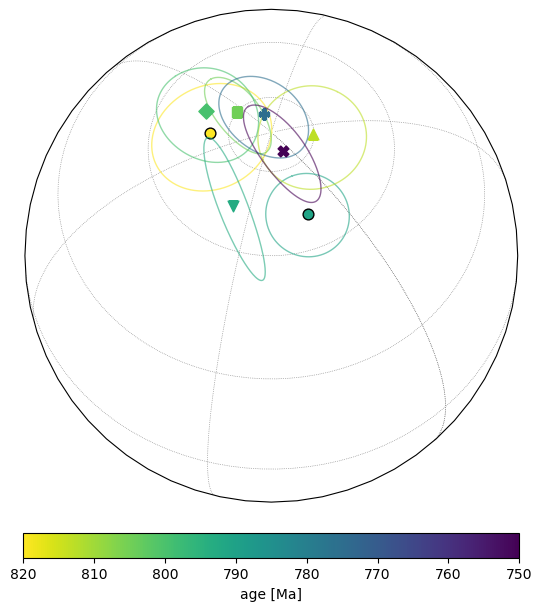

In [85]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=135, central_latitude=60,
                                 figsize=(8,8), grid_lines=False)

lat_grid = [-80,-60,-30,0,30,60,80]
lon_grid = np.arange(-180,180+60,60)
ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

rotated_pole_plot(ax, Xiaofeng_plon, Xiaofeng_plat, Xiaofeng_A95,
                  [SChina_India_Euler, India_Eulers[0]],
                  marker='o', s=60, marker_color=Xiaofeng_color)
rotated_pole_plot(ax, Guzhang_sills_plon, Guzhang_sills_plat, Guzhang_sills_A95,
                  [SChina_India_Euler, India_Eulers[0]],
                  marker='o', s=60, marker_color=Guzhang_sills_color)
rotated_kent_pole_plot(ax, Xiajiang_Kent_mean, [SChina_India_Euler,India_Eulers[0]],
                       marker='^', s=60, marker_color=Xiajiang_color, alpha=0.6)
rotated_kent_pole_plot(ax, Madiyi_Kent_mean, [SChina_India_Euler, India_Eulers[0]],
                       marker='s', s=60, marker_color=Madiyi_color, alpha=0.6)
rotated_kent_pole_plot(ax, Chenjiang_Kent_mean, [SChina_India_Euler, India_Eulers[0]],
                       marker='D', s=60, marker_color=Chenjiang_color, alpha=0.6)
rotated_kent_pole_plot(ax, Jing2025_Kent_mean_pole, [SChina_India_Euler, India_Eulers[5]],
                       marker='v', s=60, marker_color=Jing2025_color, alpha=0.6)
rotated_kent_pole_plot(ax, lower_Liantuo_Kent_mean, [SChina_India_Euler, India_Eulers[5]],
                       marker='P', s=60, marker_color=lower_Liantuo_color, alpha=0.6)
rotated_kent_pole_plot(ax, upper_Liantuo_Kent_mean, [SChina_India_Euler, India_Eulers[5]],
                       marker='X', s=60, marker_color=upper_Liantuo_color, alpha=0.6)

# for i in range(len(India_Eulers)):
#     craton_plot(ax, [6024], [SChina_India_Euler,India_Eulers[i]], 'k', pole_colors[i], 1.0, 0.5)
#     craton_plot(ax, [6023], [SChina_India_Euler,India_Eulers[i]], 'k', pole_colors[i], 1.0, 0.5)
#     craton_plot(ax, [602], [SChina_India_Euler,India_Eulers[i]], 'k', pole_colors[i], 1.0, 0.5)

color_mapping = plt.cm.ScalarMappable(cmap='viridis',norm=plt.Normalize(vmin=age_min,vmax=age_max))
color_mapping._A = []
cbar = plt.colorbar(color_mapping, orientation='horizontal', shrink=0.8,
                    pad=0.05, label='age [Ma]')
cbar.ax.invert_xaxis()


In [ ]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=135, central_latitude=60,
                                 figsize=(8,8), grid_lines=False)

lat_grid = [-80,-60,-30,0,30,60,80]
lon_grid = np.arange(-180,180+60,60)

color_mapping = plt.cm.ScalarMappable(cmap='viridis',norm=plt.Normalize(vmin=vmin,vmax=vmax))
pole_colors = color_mapping.to_rgba(SChina_site_06['age'].tolist()).tolist()

for i in range(len(SChina_site_06)):
    rotated_pole_plot(ax, SChina_site_06['plon'][i], SChina_site_06['plat'][i], SChina_site_06['a95'][i],
                      [SChina_India_Euler,India_Eulers[i]],
                      'o', 20, 'C7', pole_colors[i], 0.25)

for i in range(len(India_Eulers)):
    craton_plot(ax, [6024], [SChina_India_Euler,India_Eulers[i]], 'k', pole_colors[i], 1.0, 0.5)
    craton_plot(ax, [6023], [SChina_India_Euler,India_Eulers[i]], 'k', pole_colors[i], 1.0, 0.5)
    craton_plot(ax, [602], [SChina_India_Euler,India_Eulers[i]], 'k', pole_colors[i], 1.0, 0.5)
    
ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)
    
color_mapping._A = []
cbar = plt.colorbar(color_mapping, orientation='horizontal', shrink=0.8,
                    pad=0.05, label='age [Ma]')
cbar.ax.invert_xaxis()

#plt.savefig('../Output/SChina_reconstructed.pdf', bbox_inches='tight')
plt.show()

In [72]:
ipmag.plot_pole??

Signature:
ipmag.plot_pole(
    map_axis,
    plon,
    plat,
    A95,
    label='',
    color='k',
    edgecolor='k',
    marker='o',
    markersize=20,
    legend='no',
    outline=True,
    filled_pole=False,
    fill_color='k',
    fill_alpha=1.0,
    mean_alpha=1.0,
    A95_alpha=1.0,
    zorder=100,
)
Source:   
def plot_pole(map_axis, plon, plat, A95, label='', color='k', edgecolor='k',
              marker='o', markersize=20, legend='no',outline=True,
              filled_pole=False, fill_color='k', fill_alpha=1.0, 
              mean_alpha = 1.0, A95_alpha=1.0, zorder=100):
    """
    This function plots a paleomagnetic pole and A95 error ellipse on a cartopy map axis.

    Before this function is called, a plot needs to be initialized with code
    such as that in the make_orthographic_map function.

    Parameters:
        map_axis : the name of the current map axis that has been developed using cartopy
        plon : the longitude of the paleomagnetic pole being plotted (i

In [ ]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=135, central_latitude=60,
                                 figsize=(8,8), grid_lines=False)

lat_grid = [-80,-60,-30,0,30,60,80]
lon_grid = np.arange(-180,180+60,60)

color_mapping = plt.cm.ScalarMappable(cmap='viridis',norm=plt.Normalize(vmin=vmin,vmax=vmax))
pole_colors = color_mapping.to_rgba(SChina_site_06['age'].tolist()).tolist()

for i in range(len(SChina_site_06)):
    rotated_pole_plot(ax, SChina_site_06['plon'][i], SChina_site_06['plat'][i], SChina_site_06['a95'][i],
                      [SChina_India_Euler,India_Eulers[i]],
                      'o', 20, 'C7', pole_colors[i], 0.25)

for i in range(len(India_Eulers)):
    craton_plot(ax, [6024], [SChina_India_Euler,India_Eulers[i]], 'k', pole_colors[i], 1.0, 0.5)
    craton_plot(ax, [6023], [SChina_India_Euler,India_Eulers[i]], 'k', pole_colors[i], 1.0, 0.5)
    craton_plot(ax, [602], [SChina_India_Euler,India_Eulers[i]], 'k', pole_colors[i], 1.0, 0.5)
    
ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)
    
color_mapping._A = []
cbar = plt.colorbar(color_mapping, orientation='horizontal', shrink=0.8,
                    pad=0.05, label='age [Ma]')
cbar.ax.invert_xaxis()

#plt.savefig('../Output/SChina_reconstructed.pdf', bbox_inches='tight')
plt.show()